## Linear pulse propagation

$E(z,t) = A(t)\cos(\omega t)$

Gaussian pulse:
$A(t) = exp(-t^2/T^2)$

In [1]:
%matplotlib inline
# %load_ext autoreload
# %autoreload 2
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import time
from IPython.display import HTML

### Envelope

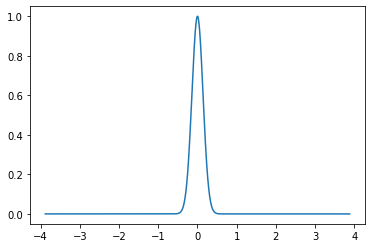

In [2]:
tp = 0.2
zmax = 1.5
beta2 = -0.1
Ld = tp**2/abs(beta2)
tpz = tp*np.sqrt(1 + (zmax/Ld)**2)

t = np.arange(-5*tpz,5*tpz,tp/100)

Ain =  np.exp(-t**2/tp**2)
plt.plot(t,Ain)

### Field

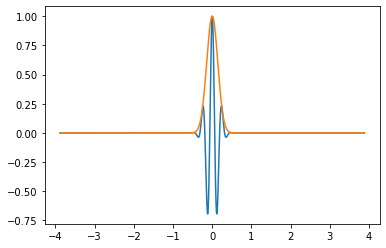

In [3]:
w = 5/tp
Ecarrier = np.exp(1j*w*t)
Ein = np.real(Ain*Ecarrier)
plt.plot(t,Ein,t,Ain);

### Dispersion

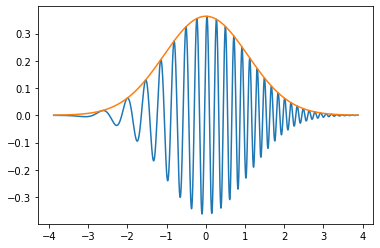

In [4]:
f = 1-2*1j*beta2*zmax/tp**2
Aout = 1/(np.sqrt(f))*np.exp((-t**2/tp**2)/f)

Eout = np.real(Aout*Ecarrier)
plt.plot(t,Eout,t,abs(Aout));

# phase = np.angle(Aout)
# freq = np.gradient(np.unwrap(phase))
# plt.plot(t,phase);

In [5]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.ion()
# fig.canvas.draw()

# for z in range(0,25):
#     phi2 = -beta2*z
#     f = 1-2*1j*phi2/tp**2
#     Aout = 1/(np.sqrt(f))*np.exp((-t**2/tp**2)/f)
#     Eout = np.real(Aout*Ecarrier)
#     if z%5==0:
#         ax.clear()
#         ax.plot(t,Eout)
#         ax.axes.set_ylim(-2,2)
#         ax.axes.set_xlim(-10,10)
#         fig.canvas.draw()
#         time.sleep(0.005)

## Animation

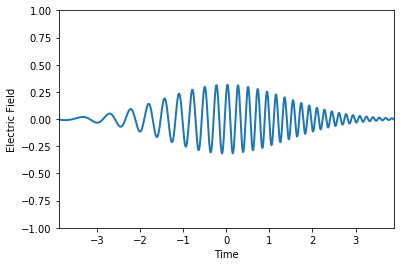

In [12]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-5*tpz,5*tpz), ylim=(-1, 1))
ax.set_xlabel('Time')
ax.set_ylabel('Electric Field')
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
z_step = 0.01
def animate(i):
    z = i*z_step
    f = 1-2*1j*beta2*z/tp**2
    Aout = 1/(np.sqrt(f))*np.exp((-t**2/tp**2)/f)
    Eout = np.real(Aout*Ecarrier)
    line.set_data(t, Eout)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

rc('animation', html='html5')

anim

# Set up formatting for the movie files
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)